# Data Exploration

In [ ]:
import os
import pandas as pd

main_folder = "/kaggle/input/plantvillage/PlantVillage"
sub_dirs = ["train", "val"]
data_list = []

# Processing dataset directory
def process_dataset(directory):
    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)
        if os.path.isdir(subdir_path):
            # Extracting plant and disease names
            plant_disease = subdir.split("___")
            plant = plant_disease[0] if len(plant_disease) > 0 else "Unknown"
            disease = plant_disease[1] if len(plant_disease) > 1 else "Healthy"

            # Iterating over images
            for img_name in os.listdir(subdir_path):
                img_path = os.path.join(subdir_path, img_name)
                data_list.append([plant, disease, img_path])

# Processing train and validation directories
for sub_dir in sub_dirs:
    dir_path = os.path.join(main_folder, sub_dir)
    if os.path.exists(dir_path):
        process_dataset(dir_path)

# Creating DataFrame
data_info = pd.DataFrame(data_list, columns=["Plant", "Disease", "Path"])
data_info

,Plant,Disease,Path
0,Tomato,Late_blight,/kaggle/input/plantvillage/PlantVillage/train/...
1,Tomato,Late_blight,/kaggle/input/plantvillage/PlantVillage/train/...
2,Tomato,Late_blight,/kaggle/input/plantvillage/PlantVillage/train/...
3,Tomato,Late_blight,/kaggle/input/plantvillage/PlantVillage/train/...
4,Tomato,Late_blight,/kaggle/input/plantvillage/PlantVillage/train/...
...,...,...,...
54300,Corn_(maize),healthy,/kaggle/input/plantvillage/PlantVillage/val/Co...
54301,Corn_(maize),healthy,/kaggle/input/plantvillage/PlantVillage/val/Co...
54302,Corn_(maize),healthy,/kaggle/input/plantvillage/PlantVillage/val/Co...
54303,Corn_(maize),healthy,/kaggle/input/plantvillage/PlantVillage/val/Co...


In [ ]:
data_info.describe()

,Plant,Disease,Path
count,54305,54305,54305
unique,14,21,54305
top,Tomato,healthy,/kaggle/input/plantvillage/PlantVillage/val/Co...
freq,18160,15084,1


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Calculating counts for each category
plant_counts = data_info["Plant"].value_counts(normalize=True) * 100
disease_counts = data_info["Disease"].value_counts(normalize=True) * 100
plant_disease_counts = data_info.groupby(["Plant", "Disease"]).size().reset_index(name="Count")
plant_disease_counts["Percentage"] = (plant_disease_counts["Count"] / plant_disease_counts["Count"].sum()) * 100

# Printing statistics
print("\nNumber of unique plant species:", data_info["Plant"].nunique())
print("Number of unique diseases:", data_info["Disease"].nunique())
print("Total number of images:", data_info.shape[0])

print("\nImages per plant:")
print(data_info["Plant"].value_counts())

print("\nImages per disease:")
print(data_info["Disease"].value_counts())

print("\nImages per plant-disease combination:")
print(data_info.groupby(["Plant", "Disease"]).size())


Number of unique plant species: 14
Number of unique diseases: 21
Total number of images: 54305

Images per plant:
Plant
Tomato                     18160
Orange                      5507
Soybean                     5090
Grape                       4062
Corn_(maize)                3852
Apple                       3171
Peach                       2657
Pepper,_bell                2475
Potato                      2152
Cherry_(including_sour)     1906
Squash                      1835
Strawberry                  1565
Blueberry                   1502
Raspberry                    371
Name: count, dtype: int64

Images per disease:
Disease
healthy                                 15084
Haunglongbing_(Citrus_greening)          5507
Bacterial_spot                           5421
Tomato_Yellow_Leaf_Curl_Virus            5357
Late_blight                              2909
Powdery_mildew                           2887
Early_blight                             2000
Black_rot                               

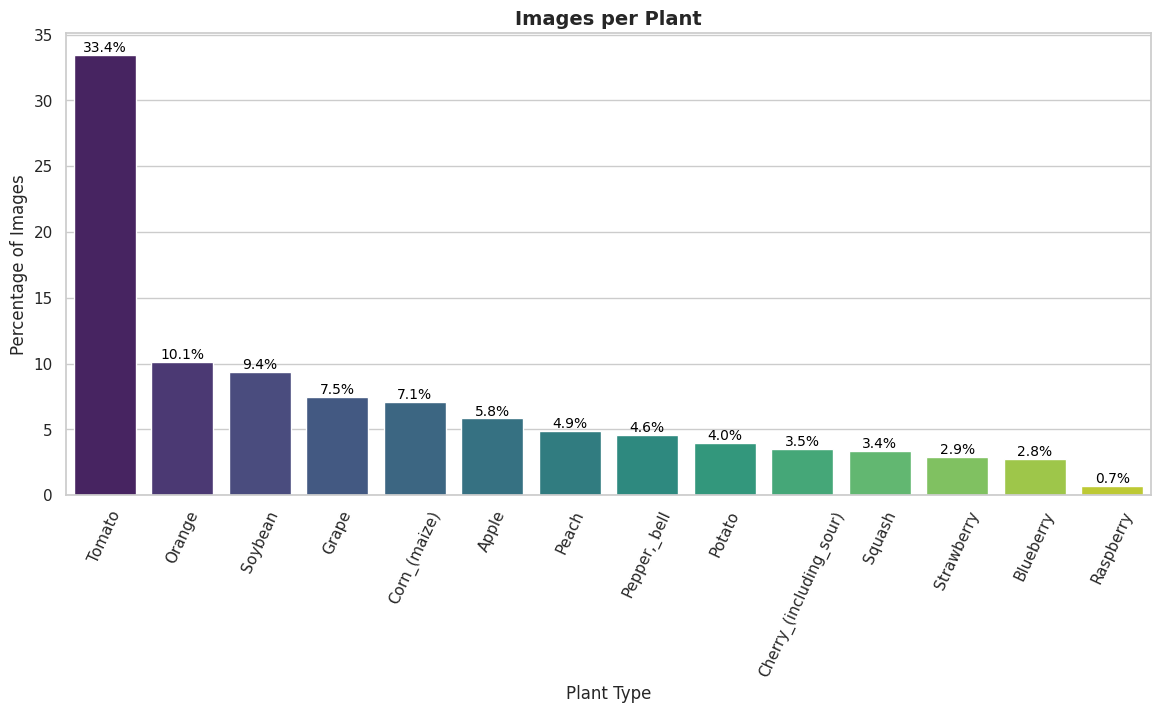

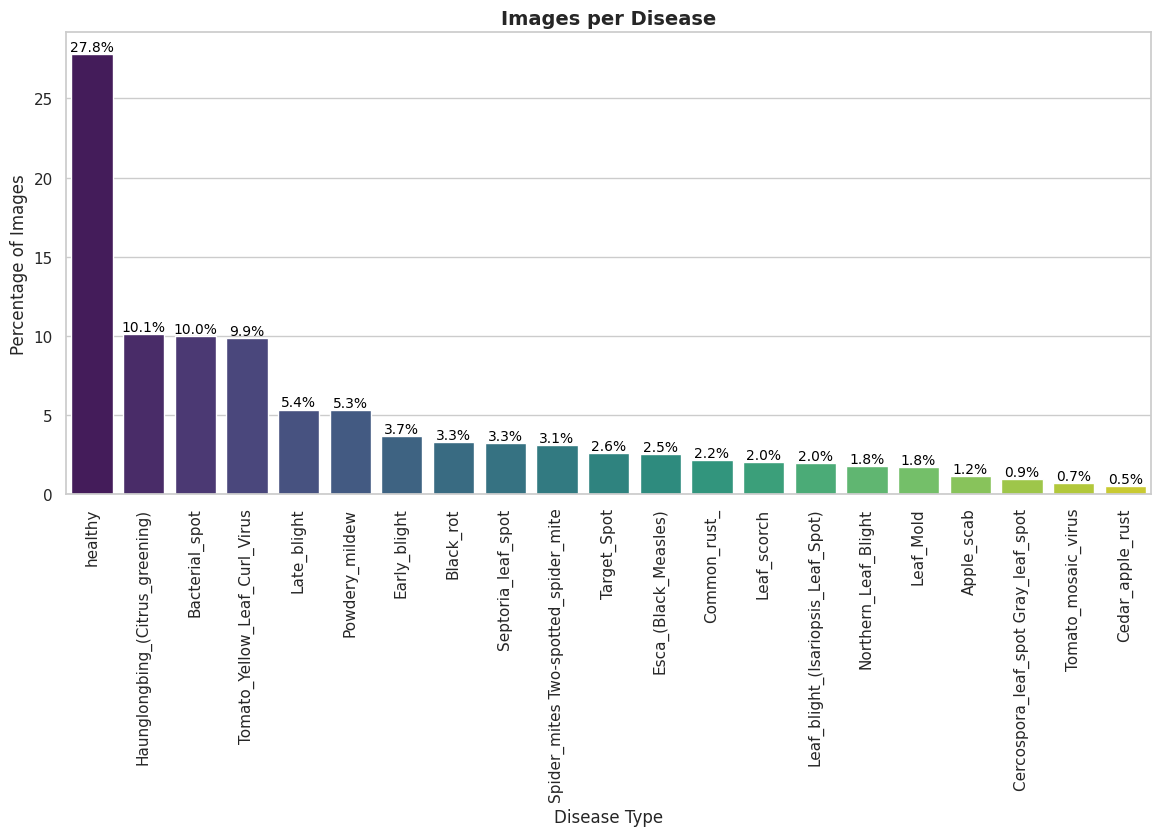

In [ ]:
# Creating bar plot with percentage annotations
def plot_bar(data, title, xlabel, ylabel, rotation=45):
    plt.figure(figsize=(14, 6))
    ax = sns.barplot(x=data.index, y=data.values, palette="viridis")

    # Adding percentages on top of bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black')

    plt.title(title, fontsize=14, fontweight="bold")
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.xticks(rotation=rotation)
    plt.show()

# Plotting images per plant
plot_bar(plant_counts, "Images per Plant", "Plant Type", "Percentage of Images", 65)

# Plotting images per disease
plot_bar(disease_counts, "Images per Disease", "Disease Type", "Percentage of Images", 90)


Number of diseases per plant:
Plant
Tomato                     10
Apple                       4
Grape                       4
Corn_(maize)                4
Potato                      3
Cherry_(including_sour)     2
Strawberry                  2
Peach                       2
Pepper,_bell                2
Blueberry                   1
Orange                      1
Raspberry                   1
Squash                      1
Soybean                     1
Name: Disease, dtype: int64


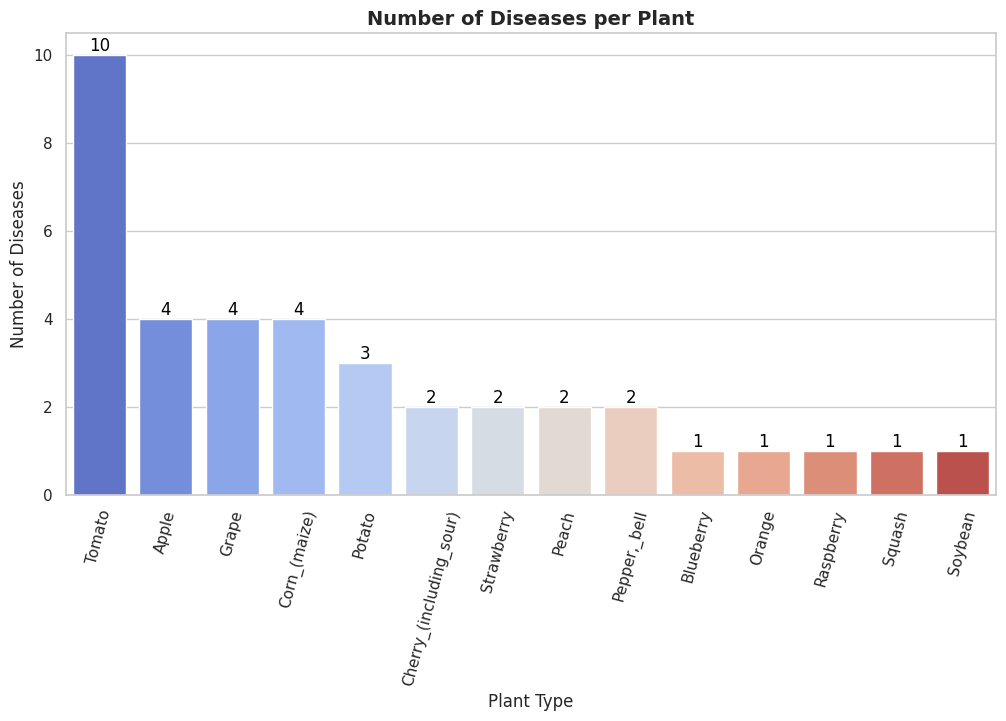

In [ ]:
# Counting unique diseases per plant
disease_per_plant = data_info.groupby("Plant")["Disease"].nunique().sort_values(ascending=False)

# Printing diseases per plant
print("\nNumber of diseases per plant:")
print(disease_per_plant)

# Plotting diseases per plant
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=disease_per_plant.index, y=disease_per_plant.values, palette="coolwarm")

# Adding value labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black')

plt.title("Number of Diseases per Plant", fontsize=14, fontweight="bold")
plt.xlabel("Plant Type", fontsize=12)
plt.ylabel("Number of Diseases", fontsize=12)
plt.xticks(rotation=75)
plt.show()

# Data Preparation and Modelling

In [ ]:
# Keeping plants for more than 1 disease
plants_with_multiple_diseases = disease_per_plant[disease_per_plant > 1].index
data_info = data_info[data_info["Plant"].isin(plants_with_multiple_diseases)]

# Printing statistics
print("\nNumber of unique plant species:", data_info["Plant"].nunique())
print("Number of unique diseases:", data_info["Disease"].nunique())
print("Total number of images:", data_info.shape[0])


Number of unique plant species: 9
Number of unique diseases: 20
Total number of images: 40000


In [ ]:
import os
import cv2
import numpy as np

def load_plant_disease_images(plant_name, dataset_path="/kaggle/input/plantvillage/PlantVillage", img_size=(128, 128)):

    train_images, train_labels = [], []
    val_images, val_labels = [], []

    # Defining train and validation paths
    sub_dirs = ["train", "val"]

    for sub_dir in sub_dirs:
        dir_path = os.path.join(dataset_path, sub_dir)
        if os.path.exists(dir_path):
            # Iterating through each folder in train/val directory
            for folder in os.listdir(dir_path):
                if folder.startswith(plant_name + "___"):
                    disease_name = folder.split("___")[1]
                    folder_path = os.path.join(dir_path, folder)

                    # Reading images from the folder
                    for img_name in os.listdir(folder_path):
                        img_path = os.path.join(folder_path, img_name)
                        img = cv2.imread(img_path)
                        if img is not None:
                            img = cv2.resize(img, img_size)
                            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

                            if sub_dir == "train":
                                train_images.append(img)
                                train_labels.append(disease_name)
                            else:
                                val_images.append(img)
                                val_labels.append(disease_name)

    # Converting lists to numpy arrays
    train_images = np.array(train_images, dtype=np.float32) / 255.0
    train_labels = np.array(train_labels)
    val_images = np.array(val_images, dtype=np.float32) / 255.0
    val_labels = np.array(val_labels)

    return train_images, train_labels, val_images, val_labels

In [ ]:
def plot_label_distribution(train_labels, plant_name):

    # Counting occurrences of each disease
    label_counts = {label: np.sum(train_labels == label) for label in np.unique(train_labels)}

    # Print the distribution
    print(f"\nLabel distribution for {plant_name}:")
    for label, count in label_counts.items():
        print(f"{label}: {count} images")

    # Converting dictionary to lists
    labels = list(label_counts.keys())
    counts = list(label_counts.values())

    # Plotting distribution
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=labels, y=counts, palette="coolwarm")

    # Adding value labels
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=12, color='black')

    plt.title(f"Distribution of Diseases for {plant_name}", fontsize=14, fontweight="bold")
    plt.xlabel("Disease Type", fontsize=12)
    plt.ylabel("Number of Images", fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

def one_hot_encode_labels(train_labels, val_labels, mode="multi"):

    # Converting labels to categorical integer values
    label_encoder = LabelEncoder()
    all_labels = np.concatenate((train_labels, val_labels))
    label_encoder.fit(all_labels)

    # Transforming labels to numeric values
    train_encoded = label_encoder.transform(train_labels)
    val_encoded = label_encoder.transform(val_labels)

    # If mode is "multi", apply One-Hot Encoding
    if mode == "multi":
        one_hot_encoder = OneHotEncoder(sparse=False, categories='auto')
        train_encoded = one_hot_encoder.fit_transform(train_encoded.reshape(-1, 1))
        val_encoded = one_hot_encoder.transform(val_encoded.reshape(-1, 1))

    # Creating mappers
    label_to_index = {label: idx for idx, label in enumerate(label_encoder.classes_)}
    index_to_label = {idx: label for label, idx in label_to_index.items()}

    return train_encoded, val_encoded, label_to_index, index_to_label

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def augment_images(train_images, batch_size=32):
    # Data augmentation transformations
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.15,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode="nearest"
    )

    # Creating the augmented dataset generator
    augmented_data = datagen.flow(train_images, batch_size=batch_size, shuffle=True)

    return augmented_data

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2

def create_transfer_learning_model(img_size, mode, label_to_index):
    """
    Creates and compiles a transfer learning model for image classification.

    Parameters:
        img_size (tuple): Input image size (height, width, channels).
        mode (str): "binary" for binary classification, "multi" for multi-class classification.

    Returns:
        tf.keras.Model: Compiled transfer learning model.
    """
    # Loading MobileNetV2 with pre-trained ImageNet weights
    base_model = MobileNetV2(input_shape=img_size, include_top=False, weights="imagenet")
    base_model.trainable = False

    # Building the model
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.3)
    ])

    # Output layer based on classification mode
    if mode == "binary":
        model.add(layers.Dense(1, activation="sigmoid"))
        loss = "binary_crossentropy"
    else:
        model.add(layers.Dense(len(label_to_index), activation="softmax"))
        loss = "categorical_crossentropy"

    # Compiling the model
    model.compile(optimizer="adam", loss=loss, metrics=["accuracy"])

    return model